# Synthetic Datasets

The `detrend1d` pacakge contains a class called `ExperimentDatasetGenerator0D` for generating synthetic 0D datasets. These synthetic datasets replicate key features of the experimental data (see the "Dataset Features" notebook) and allow for explicit effect specifications, including for example (i) true inter-condition differences, (ii) within-session linear trends, and (iii) across-session linear trends.

The key benefits of synthetic dataset generation include:

- Test data analysis code for atrbitrary, controlled data scenarios
- Numerically validate statistical procedures; when there are no true effects, a valid statistical procedure should yield false positives with a frequency of $\alpha$ (usually $\alpha$=0.05)

Numerical validity is considered in a separate notebook. This notebook only introduces dataset generation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import detrend1d as dtr

## Creating a dataset generator

In [2]:
# create generator:
n          = 150    # number of observations per session
cond       = [0, 0, 1, 0, 2, 0, 3, 0]   # conditions
nsess      = len(cond)
# mu         = np.linspace(20, 25, 7)  + [0,0,0,0,0,0,0]# within-session means
mu         = np.zeros(nsess)  # true within-session means
sigma      = np.ones(nsess)   # within-session SDs
dt         = 0.7     # within-session step duration mean
dts        = 0.01    # within-session step duration SD
sdt        = 9 * 60  # between-session duration (mean; start-to-start) (s)
sdts       = 10      # between-session duration (standard deviation) (s)
a          = np.zeros(nsess)  # within-session linear trend (slope)
b          = np.zeros(nsess)  # within-session linear trend (intercept)
exp_model  = dict(n=n, cond=cond, mu=mu, sigma=sigma, dt=dt, dts=dts, sdt=sdt, sdts=sdts, a=a, b=b)


egen       = dtr.rand.ExperimentDatasetGenerator0D( **exp_model )

print( egen )

## Generating synthetic datasets (as arrays)

The `generate` method can be used to generate synthetic datasets like this:


In [3]:
np.random.seed(0)
t,y,s,c    = egen.generate( as_object=False )

print( t.shape )
print( y.shape )
print( s.shape )
print( c.shape )

print()

print( t[:5] )
print( y[:5] )
print( s[:5] )
print( c[:5] )

(1200,)
(1200,)
(1200,)
(1200,)

[0.         0.69848643 1.39745424 2.10156022 2.80300066]
[ 1.12663592 -1.07993151 -1.14746865 -0.43782004 -0.49803245]
[0 0 0 0 0]
[0 0 0 0 0]


<br>
<br>

These output variables are:

- `t` : step time
- `y` : dependent variable
- `s` : session
- `c` : condition

<br>
<br>

## Generating synthetic datasets (as objects)

Synthetic datasets can alternatively be generated as `Dataset0D` objects:

In [4]:
np.random.seed(0)
dset       = egen.generate( as_object=True )
print( dset )


The data can be visualized using the `plot` method:

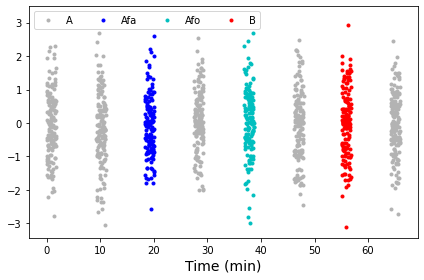

In [5]:
plt.figure()
dset.plot( legend=True )
plt.show()

Changing the within-session means can be used to simulate linear cross-session trends, like this:

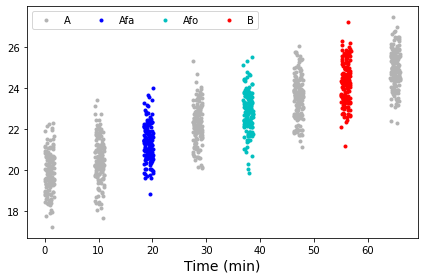

In [6]:
mu         = np.linspace(20, 25, len(cond))   # within-session means
exp_model  = dict(n=n, cond=cond, mu=mu, sigma=sigma, dt=dt, dts=dts, sdt=sdt, sdts=sdts, a=a, b=b)
egen       = dtr.rand.ExperimentDatasetGenerator0D( **exp_model )


np.random.seed(0)
dset       = egen.generate( as_object=True )


plt.figure()
dset.plot( legend=True )
plt.show()

<br>
<br>

Objects of the `Dataset0D` class contain an attribute `md`, which is a `Metadata` object (see the "Metadata" notebook).

<br>
<br>

In [7]:
print( dset.md )

Metadata
    nsess    = 8
    nsteps   = 1200

--Sessions:
    scondstr  = ['A', 'A', 'Afa', 'A', 'Afo', 'A', 'B', 'A']
    scond     = [0 0 1 0 2 0 3 0]
    snsteps   = [150 150 150 150 150 150 150 150]
    st        = [   0.          557.64052346 1101.64209554 1651.42947538 2213.83840738
 2772.51398728 3302.74120848 3852.24209265]



<Figure size 432x288 with 0 Axes>

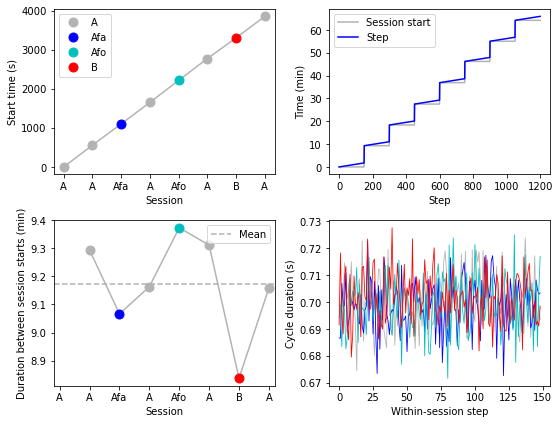

In [8]:
plt.figure()
dset.md.plot()
plt.show()